# load data

In [16]:
import pandas as pd

file = '../temp/node_importances_xgb.csv'
importance = pd.read_csv(file)
importance

,Node Importance
0,0.436693
1,0.240310
2,0.248062
3,0.372093
4,0.493540
...,...
95,0.206718
96,0.253230
97,0.105943
98,0.335917


In [ ]:
import numpy as np

adj_matrix =  np.load('../temp/adjacency_matrix.npy')
adj_matrix.shape

(100, 100)

In [13]:
from scipy.sparse import csr_matrix

# Convert the adjacency matrix to a sparse matrix
sparse_matrix = csr_matrix(adj_matrix)

# Extract the sparse edge list
edges = sparse_matrix.nonzero()
edge_list = list(zip(edges[0], edges[1]))

edge_list[:5]

[(1, 9), (1, 10), (1, 19), (2, 20), (3, 21)]

In [40]:
# remove 0 connections nodes
zero_node_set = set()
for i in range(len(adj_matrix)):
    if np.sum(adj_matrix[i]) == 0:
        zero_node_set.add(i)
edge_list_filtered = [
    edge
    for edge in edge_list
    if edge[0] not in zero_node_set and edge[1] not in zero_node_set
]

In [ ]:
np.array(edge_list).min(), np.array(edge_list).max()
# node idx is 0, 1, ..., 99

(1, 99)

In [22]:
importance.iloc[0, 0], importance.iloc[1, 0]

(0.4366925064599483, 0.2403100775193798)

In [35]:
node_list = [
    (i, {'weight': importance.iloc[i, 0], 'idx': i}) for i in range(100)
]
node_list[:5]

[(0, {'weight': 0.4366925064599483, 'idx': 0}),
 (1, {'weight': 0.2403100775193798, 'idx': 1}),
 (2, {'weight': 0.2480620155038759, 'idx': 2}),
 (3, {'weight': 0.3720930232558139, 'idx': 3}),
 (4, {'weight': 0.4935400516795866, 'idx': 4})]

In [41]:
node_list_filtered = [
    (i, {'weight': importance.iloc[i, 0], 'idx': i})
    for i in range(100)
    if i not in zero_node_set
]

# 3d plot

In [42]:
import plotly.graph_objects as go
import networkx as nx
import numpy as np

# Create a graph
G = nx.Graph()
# G.add_nodes_from([(1, {'weight': 0.1}), (2, {'weight': 0.6}), (3, {'weight': 0.9}), (4, {'weight': 0.3})])
# G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])
G.add_nodes_from(node_list_filtered)
G.add_edges_from(edge_list_filtered)

# Generate random 3D positions for the nodes
pos = nx.spring_layout(G, dim=3)  # 3D spring layout

# Extract positions for plotting
x = [pos[node][0] for node in G.nodes()]
y = [pos[node][1] for node in G.nodes()]
z = [pos[node][2] for node in G.nodes()]

# Prepare edges for 3D visualization
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # None for line breaks
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# Create the figure
fig = go.Figure()

# Add edges to the figure
fig.add_trace(go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
))

# Add nodes with colors based on weight
fig.add_trace(go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    # text=[f'Node {node}: {G.nodes[node]["weight"]}' for node in G.nodes()],
    text=[f'{G.nodes[node]["idx"]}' for node in G.nodes()],
    textposition="top center",
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        size=10,
        color=[G.nodes[node]['weight'] for node in G.nodes()],  # Node colors by weight
        colorbar=dict(thickness=15, title="Node Weight", xanchor='left', titleside='right'),
    ))
)

# Update the layout
fig.update_layout(title='3D Node Connected Graph with Weights', 
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  showlegend=False)
fig.update_layout(scene=dict(
    xaxis=dict(showbackground=False),
    yaxis=dict(showbackground=False),
    zaxis=dict(showbackground=False)
))
# Show the figure
fig.show()

# 2d plot

/tmp/ipykernel_10956/1183172942.py:26: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



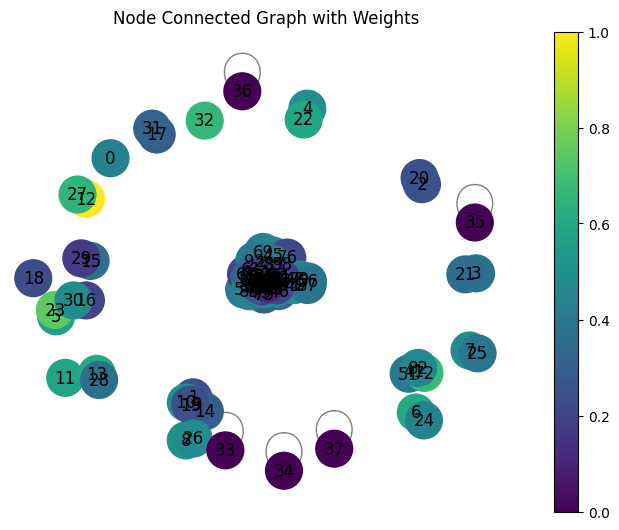

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes with a 'weight' attribute
G.add_nodes_from(node_list)

# Add edges
G.add_edges_from(edge_list)

# Get weights for coloring
weights = [G.nodes[node]['weight'] for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)  # Positioning nodes
nx.draw(G, pos, with_labels=True, node_size=700, 
        node_color=weights, 
        cmap=plt.cm.viridis,  # Colormap to use
        edge_color='gray')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm.set_array([])
plt.colorbar(sm)

plt.title("Node Connected Graph with Weights")
plt.show()